In [5]:
%pip install pandas nltk textblob wordcloud

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)

   ----- ---------------------------------- 1/7 [contourpy]
   ----------- ---------------------------- 2/7 [click]
 

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\adamg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
# Ścieżka do pliku CSV
file_path = 'training.1600000.processed.noemoticon.csv'

In [ ]:
# Kolumny w dataset
columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Wczytanie danych
df = pd.read_csv(file_path, encoding='ISO-8859-1', names=columns)

# Wybranie interesującej nas kolumny
df = df[['text']]

In [ ]:
# Pobranie stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adamg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Funkcja do czyszczenia tekstu
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [11]:
# Zastosowanie funkcji clean_text do kolumny 'text'
df['cleaned_text'] = df['text'].apply(clean_text)

In [12]:
# Funkcja do analizowania sentymentu
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity < 0:
        return 'negative'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [13]:
# Dodanie nowej kolumny z wynikiem analizy sentymentu
df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)

# Wyświetlenie pierwszych kilku wierszy
print(df.head())

# Podstawowe statystyki
print(df['sentiment'].value_counts())

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text sentiment  
0      thats bummer shoulda got david carr third day   neutral  
1  upset cant update facebook texting might cry r...   neutral  
2  dived many times ball managed save 50 rest go ...  positive  
3                   whole body feels itchy like fire  positive  
4                           behaving im mad cant see  negative  
sentiment
positive    675035
neutral     594035
negative    330930
Name: count, dtype: int64


In [14]:
# Wyświetlenie 5 tweetów z każdej grupy sentymentu
print("\nNegative Tweets:")
print(df[df['sentiment'] == 'negative'].head(5))

print("\nNeutral Tweets:")
print(df[df['sentiment'] == 'neutral'].head(5))

print("\nPositive Tweets:")
print(df[df['sentiment'] == 'positive'].head(5))


Negative Tweets:
                                                 text  \
4   @nationwideclass no, it's not behaving at all....   
10        spring break in plain city... it's snowing    
25     I hate when I have to call and wake people up    
27                             im sad now  Miss.Lilly   
35  ok I'm sick and spent an hour sitting in the s...   

                                         cleaned_text sentiment  
4                            behaving im mad cant see  negative  
10                    spring break plain city snowing  negative  
25                              hate call wake people  negative  
27                                   im sad misslilly  negative  
35  ok im sick spent hour sitting shower cause sic...  negative  

Neutral Tweets:
                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
6                                        Need a hug    
8 

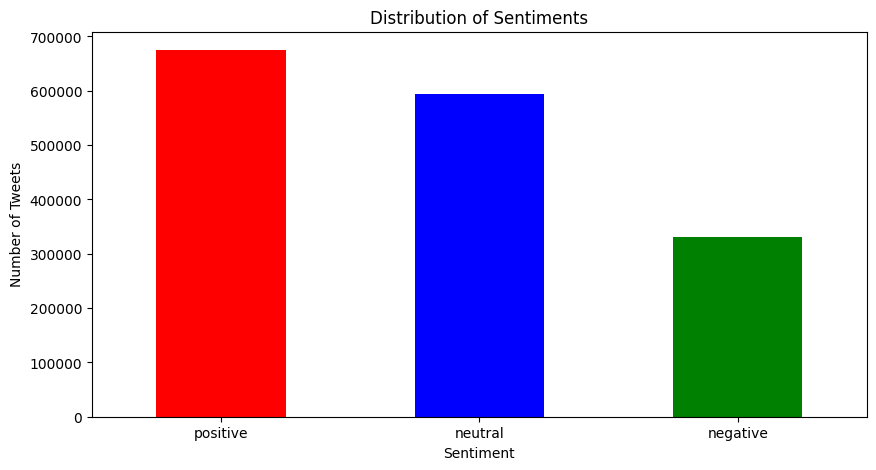

In [15]:
# Przedstawienie histogramu
plt.figure(figsize=(10, 5))
df['sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

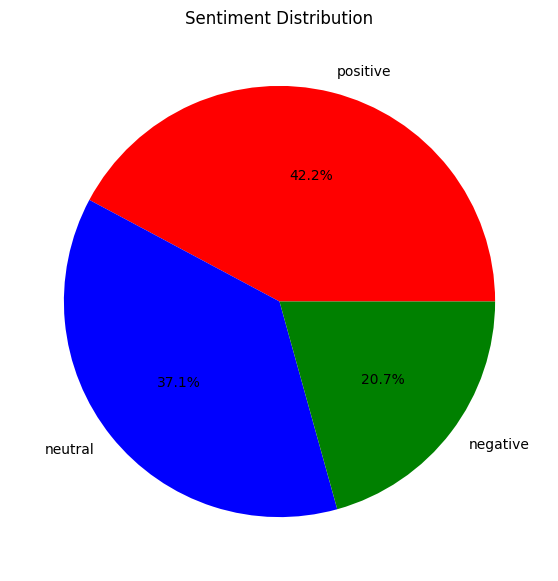

In [16]:
# Przedstawienie wykresu kołowego
plt.figure(figsize=(7, 7))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue', 'green'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

Wordcloud for Negative Tweets:


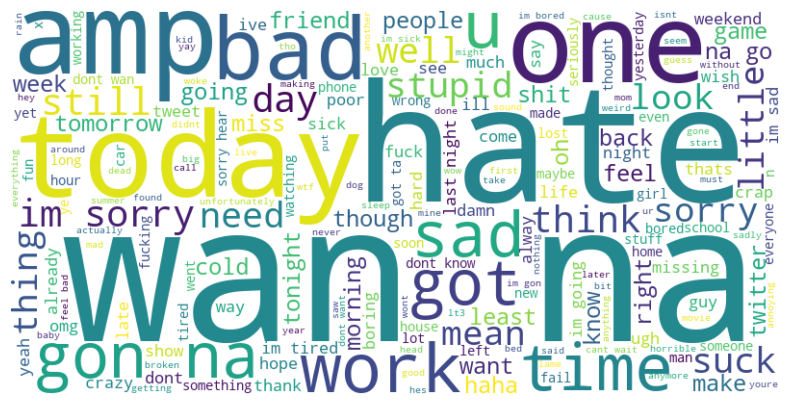

In [17]:
# Wybieranie tylko negatywnych tweetów
negative_tweets = df[df['sentiment'] == 'negative']

# Funkcja do połączenia tekstu tweetów w jedną długą ciągłą linię
def combine_text(text_series):
    return ' '.join(text_series)

# Połączenie tekstów tweetów negatywnych
negative_text = combine_text(negative_tweets['cleaned_text'])

# Funkcja do stworzenia chmury słów
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generowanie chmury słów dla negatywnych tweetów
print("Wordcloud for Negative Tweets:")
generate_wordcloud(negative_text)

Wordcloud for Positive Tweets:


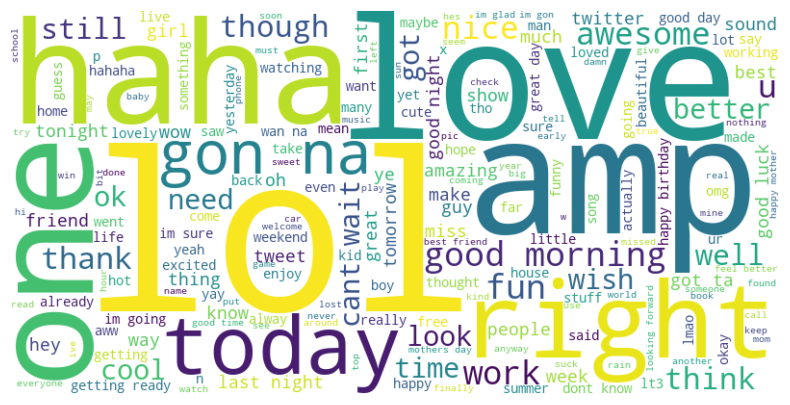

In [20]:
# Word cloud dla tweetów pozytywnych
positive_tweets = df[df['sentiment'] == 'positive']

def combine_text(text_series):
    return ' '.join(text_series)

positive_text = combine_text(positive_tweets['cleaned_text'])

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

print("Wordcloud for Positive Tweets:")
generate_wordcloud(positive_text)

Wordcloud for Positive Tweets:


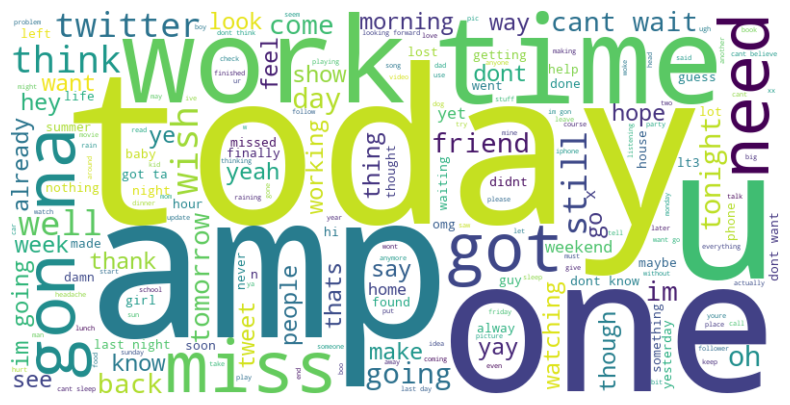

In [ ]:
# Word cloud dla tweetów neutranych
neutral_tweets = df[df['sentiment'] == 'neutral']

def combine_text(text_series):
    return ' '.join(text_series)

neutral_text = combine_text(neutral_tweets['cleaned_text'])

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

print("Wordcloud for Positive Tweets:")
generate_wordcloud(neutral_text)